In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = "C:\\Users\\pushkar\\Dell_Inspiron_works\\Keith_Gali_Working_With_Real_World"
os.chdir(path)
print(os.getcwd())

C:\Users\pushkar\Dell_Inspiron_works\Keith_Gali_Working_With_Real_World


In [6]:
from glob import glob

In [7]:
files = glob('*.csv')

In [8]:
files.sort()
files

['complete_data.csv']

In [9]:
data = pd.concat( (pd.read_csv(file) for file in files), ignore_index=True)

In [10]:
data.shape

(186850, 6)

In [11]:
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


###### Another Way

In [11]:
files = [file for file in os.listdir('./Sales_Data')]

all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_month_data = pd.concat([all_month_data, df])
    
all_month_data.to_csv('complete_data.csv', index = False)    

### Add the month column here

In [14]:
df = pd.read_csv('complete_data.csv')

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [16]:
# Method-1
df['Order Date'].str[0:2]
df['month'] = df['Order Date'].str[0:2]
df.sample(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
164304,268441,Wired Headphones,1,11.99,10/08/19 22:06,"950 Elm St, Los Angeles, CA 90001",10
76339,149612,Wired Headphones,1,11.99,01/22/19 23:17,"247 Meadow St, San Francisco, CA 94016",01


In [17]:
df['month']= df['month'].astype('int32')

ValueError: cannot convert float NaN to integer

#### Cleaning the data

In [18]:
nan_df = df[df.isna().all(axis=1)] 
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.dropna(how='all',inplace = True)
df.sample(n=4, random_state =0)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
25628,243605,LG Dryer,1,600.0,08/12/19 22:24,"288 Walnut St, Seattle, WA 98101",08
116824,173052,27in FHD Monitor,1,149.99,03/16/19 09:32,"889 Main St, Austin, TX 73301",03
30585,295839,Apple Airpods Headphones,1,150,12/23/19 12:28,"340 Lakeview St, Seattle, WA 98101",12
79129,224701,AA Batteries (4-pack),1,3.84,07/22/19 20:23,"649 Jackson St, Atlanta, GA 30301",07


In [20]:
df['month'] = df['month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

**There are some places in month column where month is "Or". Let's check that**

In [21]:
# First Way
temp_df = df[df['Order Date'].str[0:2] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [22]:
# Second Way
df.month.unique()

array(['04', '05', 'Or', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

In [34]:
# Third Way
df[df['month'] == "Or"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [35]:
# Delete all the or from our dataframe
df = df[df['month'] != 'Or']

In [36]:
df['month'] = df['month'].astype(int)

In [37]:
df.month.dtypes

dtype('int32')

#### Finally we get it done here!


___
##### Here are some other methods to solve this problem...

In [94]:
# METHOD-2
df['Order Date'].str.slice(0,2)
df['month'] = df['Order Date'].str.slice(0,2)

In [113]:
### Method_3
df['Order Date']= pd.to_datetime(df['Order Date'])

In [116]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
month                        int32
dtype: object

In [119]:
df['Month']= df['Order Date'].dt.month.apply(lambda x: x)

In [120]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,4


### What was the best month for sales? How much was earned that month

In [39]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [41]:
# Now let's just check the NaN values in our DataFrame.
nan_df = df[df.isna().all(axis=1)] 
len(nan_df)

0

In [44]:
# Let's look at our columns
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
month               0
dtype: int64

In [45]:
df.dropna(how='all').head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [46]:
df.shape

(185950, 7)

In [47]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int32
dtype: object

In [56]:
df.drop(columns = 'month', inplace = True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


####  Creating a Sales Column

In [57]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']
df.head

TypeError: can't multiply sequence by non-int of type 'str'

*Now, we are getting the following error:*  **TypeError: can't multiply sequence by non-int of type 'str'**

So, Here we're trying to calculate mathematical operation on string data types that's why **TypeError**

In [59]:
# Let's check the dtypes again
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

##### Again, we could convert these two columns(**Quantity Ordered**, **Price Each**) to numeric datatype in a mulitple way

In [62]:
# First way
chk_type = pd.to_numeric(df['Quantity Ordered'])
chk_type.dtypes

dtype('int64')

In [66]:
# Second Way
df['Quantity Ordered'].astype('int64').dtypes

dtype('int64')

**Finally Let's convert these two column values into int datatype**

In [67]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=  pd.to_numeric(df['Price Each'])

In [68]:
# Let's check the datatypes
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

**There is one advantage to use to_numeric() fuction, it auomatically converts the string into desired type, like here it has converted the "Price Each" Column to float64 and Quantity ordered to int64(integer) datatypes.**

In [70]:
# Let's Create a Sales column which would carry the to price paid on each transaction
df['Sales'] = df['Price Each'] * df['Quantity Ordered']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


___
*Now since we got the sales column, let's get back to our question to find the best month for sales and the amount earned that month*

In [71]:
df.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


___
**Let's just visualize it to get the better idea quickly**

#### Again we could do it in a multiple ways

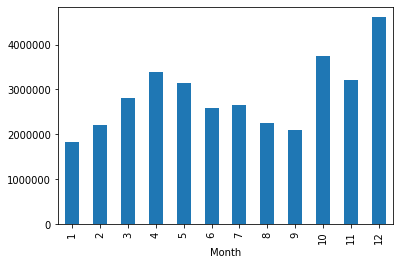

In [75]:
# Method 1: The Pandas Way
df.groupby('Month').Sales.sum().plot(kind = 'bar')

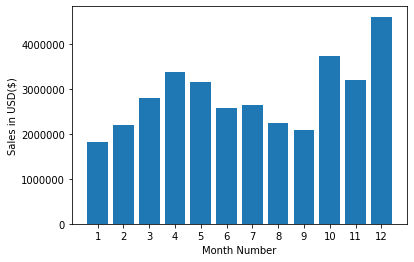

In [79]:
# Method 2: The Matplotlib Way
months = range(1,13)
plt.bar(months,df.groupby('Month').Sales.sum())
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month Number')
plt.show()

#### So, It's clear that the best month for sales was December, Maybe coz of Christmas and other festivals

## 2. Which City has highest number of Sales

In [80]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


**we don't have a city column here, but we do have address where city is mentioned** *Let's go grab it from there*

**Again, we could do it in a multiple way**

In [86]:
# Method 1
df['city'] = df['Purchase Address'].str.split(',').apply(lambda x: x[1])

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [87]:
# Method 2
def get_city(address):
    return address.split(',')[1]

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x))

In [88]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles


In [89]:
df.drop(columns = 'city', inplace = True)

###### ... But, then City only isn't clear enough, we need to consider the city Code as well. 

In [133]:
%%time
# Method 1
df['City'] = df['Purchase Address'].str.split(',').apply(lambda x: x[1]+ " "+x[2])

Wall time: 439 ms


In [101]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001


In [132]:
%%time
# Method 2
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2]

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x)+" "+get_state(x))

Wall time: 196 ms


In [104]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA 90001


###### I could still see some issues here, the Zip code is also getting added, which i don't want

In [131]:
%%time
# Method 1
df['City'] = df['Purchase Address'].str.split(',').apply(lambda x: x[1]+ " ("+x[2].split(" ")[1]+")")
df.head()

Wall time: 487 ms


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [130]:
%%time
# Method 2
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x)+" ("+get_state(x)+")")

df.head()

Wall time: 238 ms


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [134]:
%%time
# Method 2
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f" {get_city(x)} {get_state(x)}")

df.head()

Wall time: 254 ms


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [138]:
# Let's check the city with highest number of sales
df.groupby('City').Sales.sum()

City
  Atlanta GA          2.795499e+06
  Austin TX           1.819582e+06
  Boston MA           3.661642e+06
  Dallas TX           2.767975e+06
  Los Angeles CA      5.452571e+06
  New York City NY    4.664317e+06
  Portland ME         4.497583e+05
  Portland OR         1.870732e+06
  San Francisco CA    8.262204e+06
  Seattle WA          2.747755e+06
Name: Sales, dtype: float64

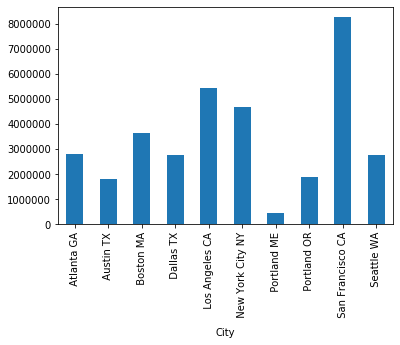

In [141]:
# Let's plot the data we got: >>>Pandas Way(METHOD 1)<<<

df.groupby('City').Sales.sum().plot(kind = 'bar')

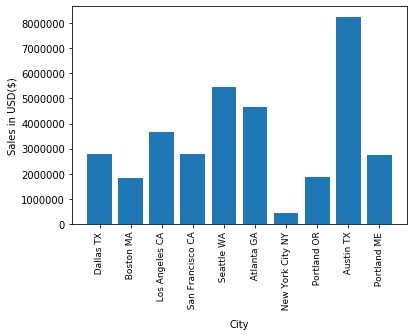

In [150]:
# Method 2: The Matplotlib Way
city = df.City.unique()
plt.bar(city,df.groupby('City').Sales.sum())
plt.xticks(city, rotation ='vertical', size = 9)
plt.ylabel('Sales in USD($)')
plt.xlabel('City')
plt.show()

###### Now, what went wrong here for us, pandas is giving us the correct bar plot but the matplotlib isn't. why is that? Let's examine it here.

**Essentially, Pandas calls numpy as well as Matplotlib internally, so that's why the grouped data gets passed to the matplot lib in the first method, but when in the second method when we're trying to work with Matplotlib directly here, we need to provide the groupby value as it doesn't know it internally as Pandas**